<a href="https://colab.research.google.com/github/PauCaBu/fluffy_CNN/blob/main/CNN_for_photoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from keras.models import Sequential
from keras.layers import Dense
from google.colab import drive
drive.mount('/content/drive')
from keras.utils import to_categorical

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/DR9_photo-z-small.pkl', 'rb') as fp:
  sdss = pickle.load(fp)


sdss

{'z_spec': array([0.39964026, 0.03212454, 0.31204817, ..., 0.5324476 , 0.51262695,
        0.56699   ], dtype=float32),
 'z_photo': array([0.344148, 0.088944, 0.184795, ..., 0.561185, 0.484233, 0.56572 ],
       dtype=float32),
 'm_u': array([25.683548, 19.1831  , 21.406612, ..., 23.680447, 24.235855,
        24.475836], dtype=float32),
 'm_g': array([20.814222, 18.070135, 19.598469, ..., 22.381622, 21.425695,
        21.95258 ], dtype=float32),
 'm_r': array([19.111876, 17.45991 , 18.403423, ..., 20.66202 , 19.643715,
        20.365267], dtype=float32),
 'm_i': array([18.458895, 17.109465, 17.858967, ..., 19.579897, 18.749413,
        19.239906], dtype=float32),
 'm_z': array([18.351385, 16.836313, 17.503328, ..., 19.051886, 18.405815,
        18.910065], dtype=float32),
 'petro50_r': array([2.3227189, 1.8831   , 2.016057 , ..., 1.2040014, 2.1167612,
        1.5639875], dtype=float32),
 'petro90_r': array([5.778584 , 4.714086 , 5.375761 , ..., 2.3662994, 7.141743 ,
        4.7438636],

Text(0, 0.5, 'z photo')

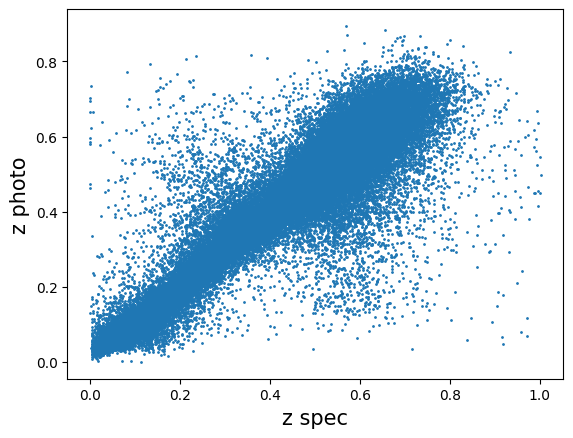

In [ ]:
plt.scatter(sdss['z_spec'], sdss['z_photo'], s=1)
plt.xlabel('z spec', fontsize=15)
plt.ylabel('z photo', fontsize=15)

Text(0, 0.5, '$M_u$')

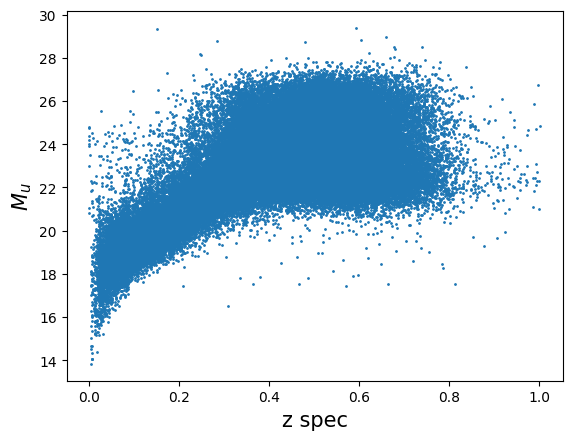

In [ ]:
plt.scatter(sdss['z_spec'], sdss['m_u'], s=1)
plt.xlabel('z spec', fontsize=15)
plt.ylabel('$M_u$', fontsize=15)

In [ ]:
X_train = np.stack( (sdss['m_u'],sdss['m_g'],sdss['m_r'],sdss['m_i'],sdss['m_z'],sdss['petro50_r'],sdss['petro90_r']),axis=1 )[0:90000,:]

Y_train = sdss['z_spec'][0:90000]

X_test = np.stack( (sdss['m_u'],sdss['m_g'],sdss['m_r'],sdss['m_i'],sdss['m_z'],sdss['petro50_r'],sdss['petro90_r']),axis=1 )[90000:100000,:]

Y_test = sdss['z_spec'][90000:100000]



In [ ]:
model = Sequential()

# We define a Dense layer with 12 neurons, and the input_dim = dimension of the input
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

# Relu helps to 'kill' the negative values

# Depending on how the CNN is constructed, some activations can make the run slower (eg. Sigmoid)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# The parameters are calculated as the input * n_neurons + n_neurons(biases)

history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)
# 1 epoch = is passing through all of the data, in this case we do it 20 times
# batch_size = number of points samples from the data where you compute the error ?


Epoch 1/20
2250/2250 [==============================] - 12s 3ms/step - loss: 0.0244 - val_loss: 0.0131
Epoch 2/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0173 - val_loss: 0.0086
Epoch 3/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0083 - val_loss: 0.0072
Epoch 4/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 5/20
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0061 - val_loss: 0.0114
Epoch 6/20
2250/2250 [==============================] - 8s 3ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 7/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0086 - val_loss: 0.0055
Epoch 8/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 9/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 10/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.00

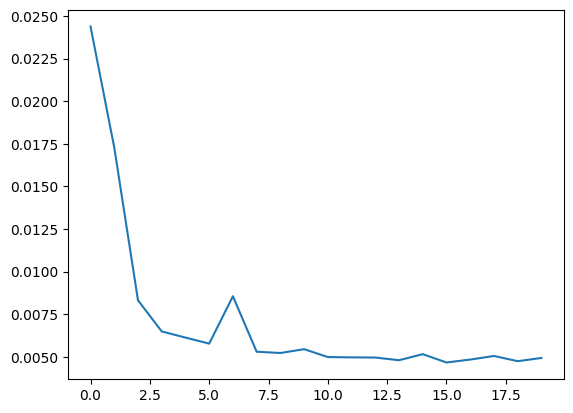

In [ ]:
plt.plot(history.history['loss'])


In [ ]:
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


Text(0.5, 0, 'z spec')

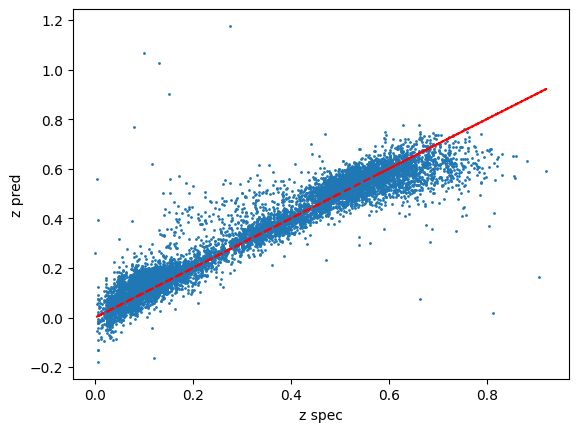

In [ ]:
plt.scatter(Y_test, y_pred, s=1)
plt.plot(Y_test, Y_test, 'red', linestyle = '--')
plt.ylabel('z pred')
plt.xlabel('z spec')

## Part two of the workshop: We want to get some errors !!!!

In [ ]:
cnt = 80
d_y_train = to_categorical((Y_train*cnt).astype(np.int32))
d_y_test = to_categorical((Y_test*cnt).astype(np.int32))


In [ ]:
n_classes = d_y_train.shape[1]
model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(n_classes, activation='softmax')) # transforms it to a probability

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 81)                1377      
                                                                 
Total params: 2441 (9.54 KB)
Trainable params: 2441 (9.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
d_y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
history = model.fit(X_train, d_y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2250/2250 [==============================] - 13s 4ms/step - loss: 3.6884 - accuracy: 0.0492 - val_loss: 3.3468 - val_accuracy: 0.0728
Epoch 2/10
2250/2250 [==============================] - 11s 5ms/step - loss: 3.2546 - accuracy: 0.0764 - val_loss: 3.0991 - val_accuracy: 0.0880
Epoch 3/10
2250/2250 [==============================] - 11s 5ms/step - loss: 3.1081 - accuracy: 0.0927 - val_loss: 3.0158 - val_accuracy: 0.1004
Epoch 4/10
2250/2250 [==============================] - 10s 5ms/step - loss: 3.0218 - accuracy: 0.1006 - val_loss: 2.9647 - val_accuracy: 0.1012
Epoch 5/10
2250/2250 [==============================] - 9s 4ms/step - loss: 2.9612 - accuracy: 0.1084 - val_loss: 2.9169 - val_accuracy: 0.1001
Epoch 6/10
2250/2250 [==============================] - 10s 4ms/step - loss: 2.9174 - accuracy: 0.1112 - val_loss: 2.9583 - val_accuracy: 0.0917
Epoch 7/10
2250/2250 [==============================] - 11s 5ms/step - loss: 2.8942 - accuracy: 0.1139 - val_loss: 3.0073 - val_acc

In [ ]:
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


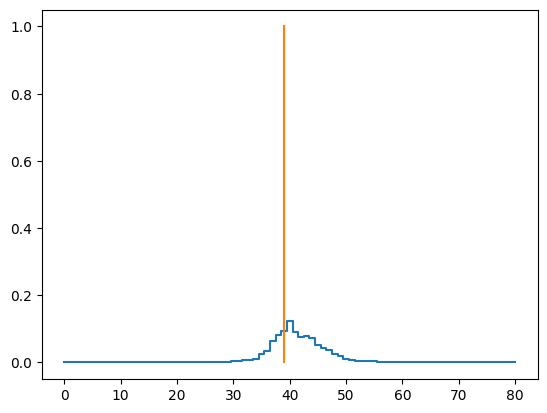

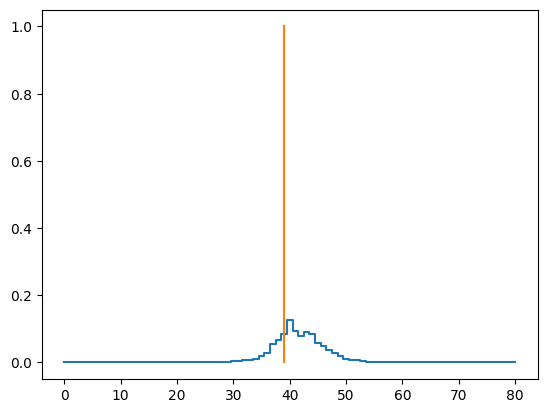

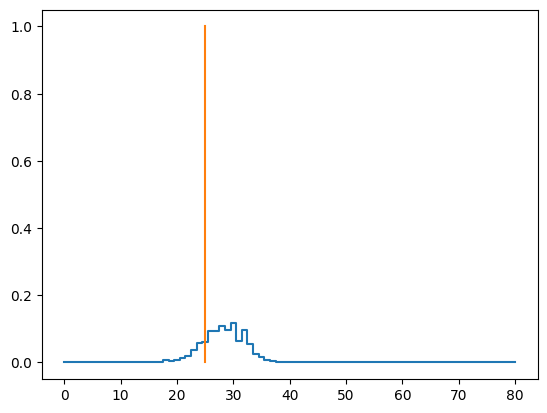

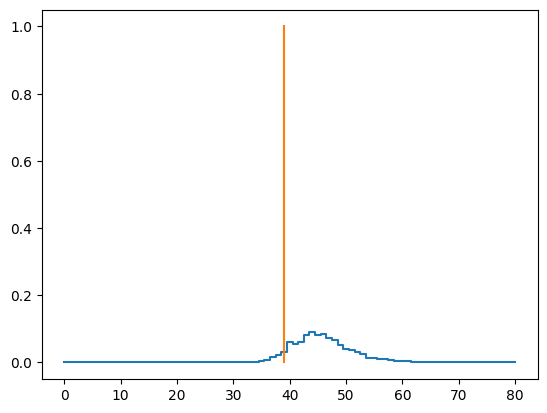

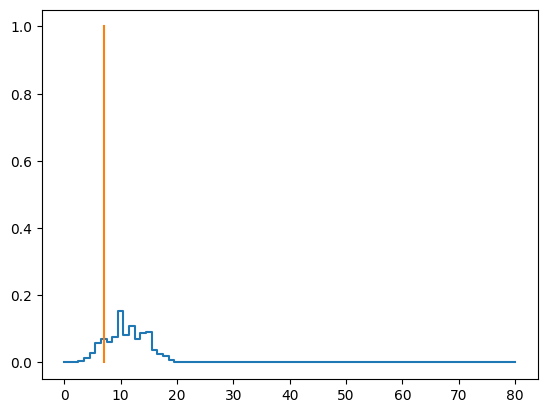

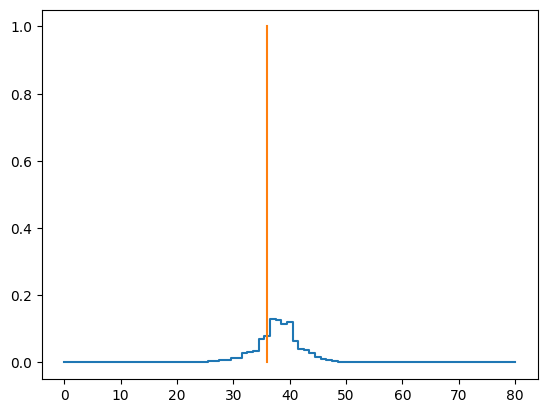

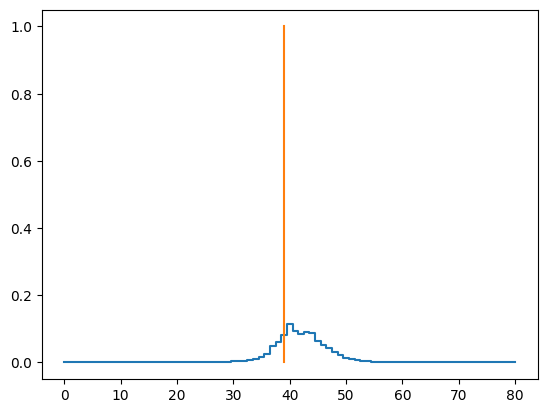

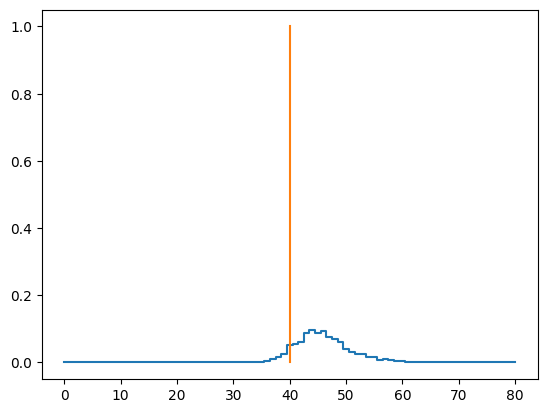

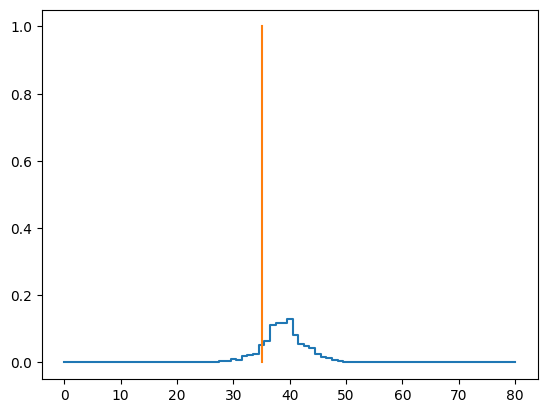

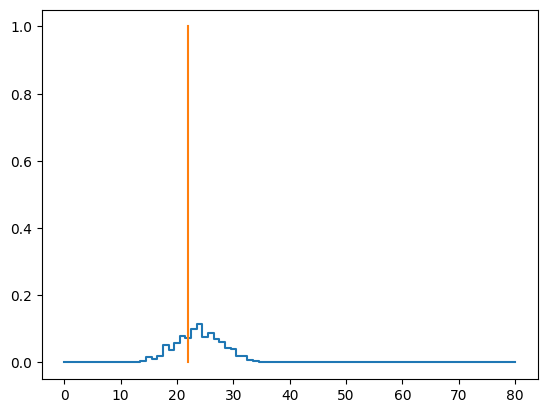

In [ ]:
ax = np.arange(n_classes)

for i in range(10):
  xi = (Y_test[i]*cnt).astype(np.int32)
  plt.plot(ax, y_pred[i,:], drawstyle='steps-mid')
  plt.plot([xi,xi], [0,1]) # display the spectroscopic redshift as a bin
  plt.show()
